## Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import StandardScaler
import random
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD
#from statsmodels.stats.proportion import proportions_ztest
import itertools

matchup_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Tournament Matchups.csv')
matchup_df = matchup_df[~matchup_df['YEAR'].isin([2008, 2009])]

# Read both CSVs and set 'TEAM NO' as the index
df_all = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Resumes.csv")
df_temp = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Shooting Splits.csv")
df_temp2 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Away.csv")
df_temp3 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Home.csv")
df_temp4 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Neutral.csv")
df_temp5 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/KenPom Barttorvik.csv")

df_temp6 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Away.csv")
df_temp7 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Home.csv")
df_temp8 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Neutral.csv")
#df_temp9 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/EvanMiya.csv")

# removing columns that are not needed
df_all = df_all.drop(columns=['TEAM', 'BID TYPE'])
df_temp = df_temp.drop(columns=['YEAR', 'TEAM ID', 'TEAM', "CONF"])
df_temp2 = df_temp2.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp3 = df_temp3.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp4 = df_temp4.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp5 = df_temp5.drop(columns=["YEAR", "SEED", "ROUND", "TEAM", "TEAM ID", "CONF","CONF ID","QUAD NO","QUAD ID"])

df_temp6 = df_temp6.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp7 = df_temp7.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp8 = df_temp8.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM ID"])
#df_temp9 = df_temp9.drop(columns=['YEAR', 'SEED', 'TEAM', 'ROUND'])

# Standardize 'TEAM NO'
df_all['TEAM NO'] = df_all['TEAM NO'].astype(str).str.strip()
df_temp['TEAM NO'] = df_temp['TEAM NO'].astype(str).str.strip()
df_temp2['TEAM NO'] = df_temp2['TEAM NO'].astype(str).str.strip()
df_temp3['TEAM NO'] = df_temp3['TEAM NO'].astype(str).str.strip()
df_temp4['TEAM NO'] = df_temp4['TEAM NO'].astype(str).str.strip()
df_temp5['TEAM NO'] = df_temp5['TEAM NO'].astype(str).str.strip()

df_temp6['TEAM NO'] = df_temp6['TEAM NO'].astype(str).str.strip()
df_temp7['TEAM NO'] = df_temp7['TEAM NO'].astype(str).str.strip()
df_temp8['TEAM NO'] = df_temp8['TEAM NO'].astype(str).str.strip()
#df_temp9['TEAM NO'] = df_temp9['TEAM NO'].astype(str).str.strip()

# Remove duplicates
df_all = df_all.drop_duplicates(subset='TEAM NO')
df_temp = df_temp.drop_duplicates(subset='TEAM NO')
df_temp2 = df_temp2.drop_duplicates(subset='TEAM NO')
df_temp3 = df_temp3.drop_duplicates(subset='TEAM NO')
df_temp4 = df_temp4.drop_duplicates(subset='TEAM NO')
df_temp5 = df_temp5.drop_duplicates(subset='TEAM NO')
df_temp6 = df_temp6.drop_duplicates(subset='TEAM NO')
df_temp7 = df_temp7.drop_duplicates(subset='TEAM NO')
df_temp8 = df_temp8.drop_duplicates(subset='TEAM NO')
#df_temp9 = df_temp9.drop_duplicates(subset='TEAM NO')

# Set 'TEAM NO' as the index
df_all = df_all.set_index('TEAM NO')
df_temp = df_temp.set_index('TEAM NO')
df_temp2 = df_temp2.set_index('TEAM NO')
df_temp3 = df_temp3.set_index('TEAM NO')
df_temp4 = df_temp4.set_index('TEAM NO')
df_temp5 = df_temp5.set_index("TEAM NO")

df_temp6 = df_temp6.set_index('TEAM NO')
df_temp7 = df_temp7.set_index("TEAM NO")
df_temp8 = df_temp8.set_index('TEAM NO')
#df_temp9 = df_temp9.set_index('TEAM NO')

# Optional: Rename columns to avoid conflicts
df_temp.columns = [f"ShootingSplits_{col}" for col in df_temp.columns]
df_temp2.columns = [f"TeamRankings_Away_{col}" for col in df_temp2.columns]
df_temp3.columns = [f"TeamRankings_Home_{col}" for col in df_temp3.columns]
df_temp4.columns = [f"TeamRankings_Neutral_{col}" for col in df_temp4.columns]
df_temp5.columns = [f"KenPom_Barttorvik_{col}" for col in df_temp5.columns]
df_temp6.columns = [f"Barttorvik_Away_{col}" for col in df_temp6.columns]
df_temp7.columns = [f"Barttorvik_Home_{col}" for col in df_temp7.columns]
df_temp8.columns = [f"Barttorvik_Neutral_{col}" for col in df_temp8.columns]
#df_temp9.columns = [f"EvanMiya_{col}" for col in df_temp9.columns]

list_csvs = [df_temp, df_temp2, df_temp3, df_temp4, df_temp5, df_temp6, df_temp7, df_temp8]


# Now join on the index (TEAM NO)
df_all = df_all.join(df_temp, how='outer')
df_all = df_all.join(df_temp2, how='outer')
df_all = df_all.join(df_temp3, how='outer')
df_all = df_all.join(df_temp4, how='outer')
df_all = df_all.join(df_temp5, how='outer')

df_all = df_all.join(df_temp6, how='outer')
df_all = df_all.join(df_temp7, how='outer')
df_all = df_all.join(df_temp8, how='outer')
#df_all = df_all.join(df_temp9, how='outer')
# Reset index if needed
df_all = df_all.dropna(axis=0)
df_all = df_all.reset_index()

df_all = df_all[df_all['YEAR'] != 2008]
df_all = df_all[df_all['YEAR'] != 2009]
df_all = df_all.dropna(axis=0)
df_all = df_all.drop(columns=['YEAR'])

df_all.rename(columns={'Barttorvik_Neutral_TEAM': 'TEAM'}, inplace=True)
print(df_all.shape)
print(df_all.head())


2025-05-04 20:54:12.431343: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-04 20:54:12.470975: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9373] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-04 20:54:12.471006: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-04 20:54:12.471971: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1534] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-04 20:54:12.478006: I tensorflow/core/platform/cpu_feature_guar

(924, 410)
  TEAM NO  SEED  ROUND  NET RPI  RESUME  WAB RANK  ELO  B POWER  Q1 W  Q2 W  \
0    1000    12     64       54      83        63   24     58.7     1     3   
1    1001     6      8       17      40        29   33     11.7     3     6   
2    1002     4      1        8      19        13   15      5.3     6     6   
3    1003    12     64       51     110        32   18     69.3     0     2   
4    1004    15     64      101     165       103   74    106.3     0     1   

   ...  Barttorvik_Neutral_BADJT RANK  Barttorvik_Neutral_AVG HGT RANK  \
0  ...                          284.0                            282.0   
1  ...                           69.0                             61.0   
2  ...                          277.0                             28.0   
3  ...                           45.0                            197.0   
4  ...                          140.0                            117.0   

   Barttorvik_Neutral_EFF HGT RANK  Barttorvik_Neutral_EXP RANK  \
0 

In [2]:
# Write column names to a text file, one per line
with open("columns.txt", "w") as f:
    for col in df_all.columns:
        f.write(col + "\n")

In [3]:
features = ['ShootingSplits_DUNKS FG%', 'ShootingSplits_CLOSE TWOS FG%', 'ShootingSplits_THREES FG%', 'Q1 W']

# Create a results dictionary
results = {}

for feature in features:
    mean_val = df_all[feature].mean()
    median_val = df_all[feature].median()
    mode_val = df_all[feature].mode().tolist()  # In case of multiple modes
    results[feature] = {
        'mean': mean_val,
        'median': median_val,
        'mode': mode_val
    }

# Convert results to a DataFrame for better readability (optional)
summary_df = pd.DataFrame(results).T  # Transpose so features are rows

print(summary_df)

                                    mean median          mode
ShootingSplits_DUNKS FG%       89.605952   90.1        [89.1]
ShootingSplits_CLOSE TWOS FG%  62.498701   62.5        [62.8]
ShootingSplits_THREES FG%      35.554762   35.5  [34.9, 36.5]
Q1 W                            3.983766    4.0           [0]


## Hypothesis Testing

In [4]:
def correlate_with_win_pct(df, team_col, win_pct_col, drop_columns=None):
    """
    Computes Pearson correlation between numeric columns in `df` and historical win percentages from `team_stats_df`.
    
    Parameters:
    - df: DataFrame with team features and a team name column.
    - team_col: Column name for team names.
    - win_pct_col: Column name for win percentage.
    - drop_columns: List of column names to exclude from correlation testing.
    
    Returns:
    - DataFrame with:
        - variable_name
        - test_statistic (Pearson r)
        - p-value
        - significant_relationship (Bonferroni corrected)
    """
    if drop_columns is None:
        drop_columns = []

    df = df.copy()

    # Convert percentage strings like "40.0%" to float if needed
    if df[win_pct_col].dtype == 'object':
        df[win_pct_col] = (
            df[win_pct_col]
            .str.replace('%', '', regex=False)
            .astype(float) / 100
        )

    variable_names = []
    list_corr_values = []
    list_p_values = []

    for col in df.columns:
        if col in [team_col, win_pct_col] or col in drop_columns:
            continue
        if pd.api.types.is_numeric_dtype(df[col]):
            valid = df[[col, win_pct_col]].dropna()
            if len(valid) >= 2:
                corr, pval = pearsonr(valid[col], valid[win_pct_col])
                variable_names.append(col)
                list_corr_values.append(corr)
                list_p_values.append(pval)

    # Create result DataFrame
    result_df = pd.DataFrame({
        'variable_name': variable_names,
        'test_statistic (Pearson r)': list_corr_values,
        'p-value': list_p_values
    })

    # Bonferroni correction
    alpha = 0.05
    num_tests = len(variable_names)
    result_df['significant_relationship'] = result_df['p-value'] < (alpha / num_tests)

    return result_df

In [5]:
pearsons_results = correlate_with_win_pct(df_all, team_col="TEAM NO", win_pct_col='KenPom_Barttorvik_WIN%')
pearsons_results.to_csv('person_results.csv', index=False)
pearsons_results = pearsons_results.sort_values(by='p-value')
pearsons_results.head(20)

,variable_name,test_statistic (Pearson r),p-value,significant_relationship
11,PLUS 500,0.982372,0.000000e+00,True
177,Barttorvik_Away_WIN%,0.805842,4.810376e-212,True
176,Barttorvik_Away_L,-0.799827,1.335527e-206,True
5,ELO,-0.734922,1.087078e-157,True
256,Barttorvik_Home_WIN%,0.706887,8.303568e-141,True
132,KenPom_Barttorvik_WAB,0.686095,1.581284e-129,True
255,Barttorvik_Home_L,-0.670367,1.321054e-121,True
211,Barttorvik_Away_WAB,0.650440,3.037242e-112,True
4,WAB RANK,-0.634550,2.861325e-105,True
175,Barttorvik_Away_W,0.616438,8.366582e-98,True


In [6]:
# plt.scatter(df_all['ShootingSplits_THREES FG%'], df_all['KenPom_Barttorvik_WIN%'])
# plt.xlabel('Threes FG % Rank')
# plt.ylabel('WIN %')
# plt.title('Threes FG % Rank vs Win %')
# plt.show()

In [7]:
pearsons_results = pearsons_results[pearsons_results['significant_relationship'] == True]
len(pearsons_results)

259

**Kruskal-Wallis Comparing Each Feature to Tournament Round Rached**

In [8]:
team_rankings_df = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings.csv")

round_reached_all_time = team_rankings_df[['TEAM NO', 'ROUND']]

round_reached_dict = dict(zip(round_reached_all_time['TEAM NO'], round_reached_all_time['ROUND']))

def create_stat_vs_round_vector(df, feature_name):
    stat_vector = []
    round_vector = []
    stat_dict = dict(zip(df['TEAM NO'], df[feature_name]))
    
    for team_no in round_reached_dict:
        if team_no > 131 and team_no <= 1000:
            team_no = str(team_no)
            if team_no in stat_dict:
                stat_vector.append(stat_dict[team_no])
                
                team_no = int(team_no)
                round_vector.append(round_reached_dict[team_no])
            
    return stat_vector, round_vector

In [9]:
import seaborn as sns
from scipy.stats import kruskal
import numpy as np

list_KW_values = []
list_p_values = []
valid_columns = []

def perform_kruskal_wallis(df):
    features = df.columns

    for feature_name in features:
        
        samples_by_group = []

        stat_vector, round_vector = create_stat_vs_round_vector(df, feature_name)

        stat_vector = np.array(stat_vector)
        round_vector = np.array(round_vector)
        
        # Combines data for champion, finalist, and final four teams 
        replace_dict = {1 : 4, 2 : 4}
        rounds = np.array([replace_dict.get(x, x) for x in round_vector])
        
        for value in np.unique(rounds):
            mask = rounds == value
            data = stat_vector[mask]
            if len(np.unique(data)) > 1:
                samples_by_group.append(data)
        
        
        if len(samples_by_group) >= 2:
            stat, p = kruskal(*samples_by_group)
            list_KW_values.append(stat)
            list_p_values.append(p)
            valid_columns.append(feature_name)
        

        # sns.violinplot(x = rounds, y = stat_vector)

        # plt.title(f'{feature_name} vs Round')
        # plt.xlabel('Round Reached')
        # plt.ylabel(feature_name)
        # plt.show()

    df2 = pd.DataFrame({
        'variable_name': valid_columns,
        'test_statistic (K.W.)': list_KW_values,
        'p-value': list_p_values
    })
    alpha = 0.05
    num_hypothesis_tests = len(valid_columns)

    # Bonferroni Correction
    df2['significant_relationship'] = df2['p-value'] < (alpha / num_hypothesis_tests)

    return df2

In [10]:
KW_results = perform_kruskal_wallis(df_all)
KW_significant_results = KW_results[KW_results['significant_relationship'] == True]
KW_significant_results = KW_significant_results.sort_values(by = 'p-value')
print(f'Number of Significant Features: {len(KW_significant_results)}')
print(KW_significant_results.head(20))

Number of Significant Features: 190
                      variable_name  test_statistic (K.W.)       p-value  \
133           KenPom_Barttorvik_WAB             310.904995  4.526707e-65   
4                          WAB RANK             310.806685  4.752536e-65   
1                              SEED             305.947454  5.271024e-64   
12                          R SCORE             301.758481  4.193695e-63   
95        KenPom_Barttorvik_BARTHAG             300.492257  7.849334e-63   
92        KenPom_Barttorvik_BADJ EM             299.357840  1.376324e-62   
90        KenPom_Barttorvik_KADJ EM             297.304344  3.803449e-62   
137  KenPom_Barttorvik_BARTHAG RANK             296.834404  4.799545e-62   
6                           B POWER             296.243742  6.429422e-62   
134  KenPom_Barttorvik_BADJ EM RANK             295.221598  1.066329e-61   
91   KenPom_Barttorvik_KADJ EM RANK             293.447021  2.566462e-61   
2                           NET RPI             280.

In [11]:
# sns.violinplot(x = df_all['ROUND'], y = df_all['ShootingSplits_THREES FG%'])

# plt.title('Threes FG % vs Round')
# plt.xlabel('Round Reached')
# plt.ylabel('Threes FG %')
# plt.show()

In [12]:
significant_features = KW_significant_results['variable_name'].tolist()
significant_features_df = df_all[significant_features]
significant_features_df.head()

,KenPom_Barttorvik_WAB,WAB RANK,SEED,R SCORE,KenPom_Barttorvik_BARTHAG,KenPom_Barttorvik_BADJ EM,KenPom_Barttorvik_KADJ EM,KenPom_Barttorvik_BARTHAG RANK,B POWER,KenPom_Barttorvik_BADJ EM RANK,...,Barttorvik_Home_EFG%,Barttorvik_Neutral_PPPO,Barttorvik_Away_TOV% RANK,Barttorvik_Away_TOV%,ShootingSplits_DUNKS D SHARE RANK,KenPom_Barttorvik_FTRD,Barttorvik_Neutral_PPPO RANK,ShootingSplits_THREES FG%D,Barttorvik_Home_FTR RANK,ShootingSplits_FARTHER TWOS FG%D RANK
0,-0.7,63,12,3.9,0.791,11.8,12.50860,67,58.7,68,...,53.7,1.083,21,15.3,8.0,26.7,71.0,31.3,302,250.0
1,1.9,29,6,97.9,0.913,21.0,20.65450,14,11.7,15,...,57.4,1.072,136,18.0,67.0,19.8,83.0,33.6,320,88.0
2,4.9,13,4,99.6,0.947,26.4,25.36860,5,5.3,3,...,55.7,1.147,255,19.8,86.0,38.7,19.0,29.7,86,27.0
3,1.7,32,12,9.5,0.782,11.5,11.76070,74,69.3,70,...,52.6,1.037,105,17.5,16.0,24.7,141.0,30.1,158,179.0
4,-3.6,103,15,0.0,0.651,5.9,5.29267,113,106.3,108,...,59.1,1.171,82,17.1,38.0,20.3,9.0,35.6,210,321.0


In [13]:
# 1) Compute the full correlation matrix in pandas
corr_matrix = significant_features_df.corr(method='pearson')

threshold = 0.9
high_corr_pairs = []
cols = corr_matrix.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        r = corr_matrix.iloc[i, j]
        if abs(r) >= threshold:
            high_corr_pairs.append((cols[i], cols[j], r))

print('Number of Highly Correlated pairs:', len(high_corr_pairs))

to_drop = set()

# print("Highly correlated feature pairs (|r| ≥ 0.9):")
for f1, f2, r in high_corr_pairs:
    to_drop.add(f2)
    # print(f"  {f1} ↔ {f2}: r = {r:.3f}")

# 3) If you want the exact p‑value for a given pair you can use scipy.stats.pearsonr
#    (e.g. for the first high‑corr pair)

reduced_df = significant_features_df.drop(columns = to_drop)

print('Number of features dropped:', len(to_drop))

if high_corr_pairs:
    f1, f2, r = high_corr_pairs[0]
    r_val, p_val = pearsonr(significant_features_df[f1], significant_features_df[f2])
    print(f"\nFor {f1} vs {f2}: Pearson r = {r_val:.3f}, p‑value = {p_val:.3g}")

print('Number of features remaining after dropping redundant features:', len(reduced_df.columns))

Number of Highly Correlated pairs: 348
Number of features dropped: 104

For KenPom_Barttorvik_WAB vs WAB RANK: Pearson r = -0.935, p‑value = 0
Number of features remaining after dropping redundant features: 86


In [14]:
# Add visualization here

## Standardize

In [15]:
df_all = df_all.drop(columns=['TEAM', 'ROUND'])

scaler = StandardScaler()
cols_to_scale = [col for col in df_all.columns if col != 'TEAM NO']
df_all_scaled = pd.DataFrame(
    scaler.fit_transform(df_all[cols_to_scale]),
    columns=cols_to_scale
)
df_all_scaled['TEAM NO'] = df_all['TEAM NO']
print(df_all_scaled.shape)
print(df_all_scaled.head()) 

(924, 408)
       SEED   NET RPI    RESUME  WAB RANK       ELO   B POWER      Q1 W  \
0  0.725899  0.042834  0.270851  0.254861 -0.515215  0.037936 -0.898458   
1 -0.568948 -0.650537 -0.364530 -0.412810 -0.307056 -0.760649 -0.296227   
2 -1.000563 -0.819194 -0.674832 -0.727008 -0.723373 -0.869392  0.607119   
3  0.725899 -0.013386  0.669810 -0.353898 -0.653987  0.218042 -1.199573   
4  1.373322  0.923601  1.482506  1.040355  0.641221  0.846715 -1.199573   

       Q2 W  Q1 PLUS Q2 W   Q3 Q4 L  ...  Barttorvik_Neutral_AVG HGT RANK  \
0 -0.413617     -0.806597  0.184136  ...                         1.842514   
1  0.697377      0.176902 -0.487033  ...                        -0.655735   
2  0.697377      0.767001 -0.487033  ...                        -1.028776   
3 -0.783948     -1.199996 -0.151449  ...                         0.881649   
4 -1.154280     -1.396696  1.526473  ...                        -0.022694   

   Barttorvik_Neutral_EFF HGT RANK  Barttorvik_Neutral_EXP RANK  \
0       

**Standardize the reduced data frame created using correlation-based feature selection**

In [16]:
scaler = StandardScaler()
cols_to_scale = [col for col in reduced_df.columns if col != 'TEAM NO']
reduced_df_scaled = pd.DataFrame(
    scaler.fit_transform(reduced_df[cols_to_scale]),
    columns=cols_to_scale
)
reduced_df_scaled['TEAM NO'] = df_all['TEAM NO']
print(reduced_df_scaled.shape)
print(reduced_df_scaled.head())

(924, 87)
   KenPom_Barttorvik_WAB   R SCORE  Q1 PLUS Q2 W      Q1 W  \
0              -0.471766 -1.370353     -0.806597 -0.898458   
1               0.079691  0.847429      0.176902 -0.296227   
2               0.715987  0.887538      0.767001  0.607119   
3               0.037271 -1.238230     -1.199996 -1.199573   
4              -1.086852 -1.462367     -1.396696 -1.199573   

   Barttorvik_Home_WAB  KenPom_Barttorvik_BADJ O RANK  \
0            -0.204420                       0.401551   
1             0.507621                      -0.656225   
2             0.507621                      -0.902556   
3             0.049880                       0.010319   
4            -1.018180                      -0.409894   

   Barttorvik_Neutral_BADJ EM RANK  Barttorvik_Neutral_TALENT RANK  \
0                        -0.499829                        0.983066   
1                        -0.384843                       -0.891561   
2                        -1.113088                       -0.8194

## Data Processing

**Creating a List of Previous Matchups to Use as Training/Testing Data**

In [17]:
matchups = []
first_team_no = 0
for index, row in matchup_df.iterrows():
    if index % 2 == 0:
        team_1_no = row["TEAM NO"]
        team_1_score = row["SCORE"]
        team_1_seed = row["SEED"]
    else:
        team_0_no = row["TEAM NO"]
        team_0_score = row["SCORE"]
        team_0_seed = row["SEED"]

        winner = 1 if team_1_score > team_0_score else 0
        
        if team_1_seed == team_0_seed:
            lower_seed_won = random.randint(0, 1)
        else:
            team_1_seed_is_lower = 1 if team_1_seed < team_0_seed else 0
            lower_seed_won = 1 if winner == team_1_seed_is_lower else 0

        matchup = (team_1_no, team_0_no, winner, lower_seed_won)
        matchups.append(matchup)
print(len(matchups))

881


**Creating Difference Vectors for Each Matchup by subtracting Each Team's Stats from that Year**

In [18]:
pred_winners = []
true_winners = []
difference_vectors = []

skipped = 0  # Track how many matchups we skip
count = 0
for matchup in matchups:
    team_1_NO = str(matchup[0])  # Make sure they're strings upfront
    team_0_NO = str(matchup[1])

    team_1_row = df_all_scaled[df_all_scaled["TEAM NO"] == team_1_NO]
    team_0_row = df_all_scaled[df_all_scaled["TEAM NO"] == team_0_NO]
    count += 1
    # Check if both teams exist in df_all_scaled
    if not team_1_row.empty and not team_0_row.empty:
        true_winners.append(matchup[2])  # Now append only if valid

        # Get stats and remove "TEAM NO" column
        team_1_stats = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_stats = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Create difference vector
        difference_vector = team_1_stats - team_0_stats
        difference_vectors.append(difference_vector)
    else:
        skipped += 1

print("Count", count)
print(f'Number of Matchups: {len(difference_vector)}')
print(f"✅ Finished creating vectors. Skipped {skipped} matchups due to missing teams.")

Count 881
Number of Matchups: 407
✅ Finished creating vectors. Skipped 26 matchups due to missing teams.


## Baseline

In [19]:
total_lower_seeds_won = 0
for matchup in matchups:
    total_lower_seeds_won += matchup[3]

print(f'Accuracy of Base Model: {total_lower_seeds_won / len(matchups)}')

Accuracy of Base Model: 0.6946651532349603


In [20]:
# Read the data
matchup_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Tournament Matchups.csv')
 
# Remove rows for 2008 and 2009
matchup_df = matchup_df[~matchup_df['YEAR'].isin([2008, 2009])]
 
# Define years of interest
years = list(range(2010, 2020)) + list(range(2021, 2025))
 
# Dictionary to store dataframes by year
dfs_by_year = {}
for year in years:
    dfs_by_year[year] = matchup_df[matchup_df['YEAR'] == year]
 
# Initialize list to store accuracies for each year
accuracies_by_year = []
 
# Loop through each year's DataFrame
for year in years:
    # Get the matchups for the year
    matchups = []
    for index, row in dfs_by_year[year].iterrows():
        if index % 2 == 0:
            team_1_no = row["TEAM NO"]
            team_1_score = row["SCORE"]
            team_1_seed = row["SEED"]
        else:
            team_0_no = row["TEAM NO"]
            team_0_score = row["SCORE"]
            team_0_seed = row["SEED"]
 
            winner = 1 if team_1_score > team_0_score else 0
 
            if team_1_seed == team_0_seed:
                lower_seed_won = random.randint(0, 1)
            else:
                team_1_seed_is_lower = 1 if team_1_seed < team_0_seed else 0
                lower_seed_won = 1 if winner == team_1_seed_is_lower else 0
 
            matchup = (team_1_no, team_0_no, winner, lower_seed_won)
            matchups.append(matchup)
 
    # Calculate the accuracy for the base model for this year
    total_lower_seeds_won = 0
    for matchup in matchups:
        total_lower_seeds_won += matchup[3]  # lower_seed_won
 
    accuracy = total_lower_seeds_won / len(matchups)
    accuracies_by_year.append((year, accuracy))
 
# Print the accuracies by year
for year, accuracy in accuracies_by_year:
    print(f'Accuracy of Base Model for {year}: {accuracy:}')
# Create a list of just the accuracies
baseline_accuracies = [accuracy for _, accuracy in accuracies_by_year]
 
model_results_df = pd.DataFrame({
    'Baseline': baseline_accuracies
})

# Print the list of accuracies
print(baseline_accuracies)

Accuracy of Base Model for 2010: 0.6825396825396826
Accuracy of Base Model for 2011: 0.6825396825396826
Accuracy of Base Model for 2012: 0.7301587301587301
Accuracy of Base Model for 2013: 0.6825396825396826
Accuracy of Base Model for 2014: 0.6507936507936508
Accuracy of Base Model for 2015: 0.8095238095238095
Accuracy of Base Model for 2016: 0.6666666666666666
Accuracy of Base Model for 2017: 0.7619047619047619
Accuracy of Base Model for 2018: 0.6666666666666666
Accuracy of Base Model for 2019: 0.6825396825396826
Accuracy of Base Model for 2021: 0.6774193548387096
Accuracy of Base Model for 2022: 0.6666666666666666
Accuracy of Base Model for 2023: 0.6984126984126984
Accuracy of Base Model for 2024: 0.6825396825396826
[0.6825396825396826, 0.6825396825396826, 0.7301587301587301, 0.6825396825396826, 0.6507936507936508, 0.8095238095238095, 0.6666666666666666, 0.7619047619047619, 0.6666666666666666, 0.6825396825396826, 0.6774193548387096, 0.6666666666666666, 0.6984126984126984, 0.682539682

In [21]:
model_results_df

,Baseline
0,0.682540
1,0.682540
2,0.730159
3,0.682540
4,0.650794
5,0.809524
6,0.666667
7,0.761905
8,0.666667
9,0.682540


## All Features Linear Regression

In [22]:
# Do logistic regression with all features
#X_train, X_test, y_train, y_test = train_test_split(difference_vectors, true_winners, test_size=0.2, random_state=42)
X = pd.DataFrame(difference_vectors, columns=df_all_scaled.drop(columns=["TEAM NO"]).columns)
y = np.array(true_winners)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

predicted_winners = LR_model.predict(X_test)

model_results_df['Linear Regression All'] = cross_val_score(LR_model,X, y, cv=14, scoring='accuracy')


print("Accuracy:", accuracy_score(y_test, predicted_winners))



# def predict_winner_logR(difference_vector, logistic_regression_model):
#     winner = logistic_regression_model.predict(difference_vector)
#     return "Team 1 Wins" if winner == 1 else "Team 2 Wins"

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.6653696498054474


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [23]:
model_results_df

,Baseline,Linear Regression All
0,0.682540,0.741935
1,0.682540,0.655738
2,0.730159,0.786885
3,0.682540,0.754098
4,0.650794,0.672131
5,0.809524,0.803279
6,0.666667,0.622951
7,0.761905,0.688525
8,0.666667,0.688525
9,0.682540,0.590164


In [24]:
len(X)

855

## Greedy Logistic Regression

In [25]:
# Ensure X is a DataFrame
X = pd.DataFrame(difference_vectors, columns=df_all_scaled.drop(columns=["TEAM NO"]).columns)
y = np.array(true_winners)

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Greedy logistic regression
greedy_lr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train.columns:
    score = cross_val_score(greedy_lr, X_train[[feature]], y_train, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr, X_train[current_features], y_train, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr.fit(X_train[selected_features], y_train)


predicted_winners_glr = greedy_lr.predict(X_test[selected_features])

model_results_df['Linear Regression Greedy'] = cross_val_score(greedy_lr,X, y, cv=14, scoring='accuracy')

print("Accuracy:", accuracy_score(y_test, predicted_winners_glr))

✅ Added: KenPom_Barttorvik_KADJ EM | New CV Accuracy: 0.6872
❌ Skipped: KenPom_Barttorvik_KADJ EM RANK | CV Accuracy would be: 0.6872
❌ Skipped: KenPom_Barttorvik_BADJ EM | CV Accuracy would be: 0.6806
❌ Skipped: Barttorvik_Home_BADJ EM RANK | CV Accuracy would be: 0.6872
✅ Added: Barttorvik_Home_BARTHAG RANK | New CV Accuracy: 0.6889
❌ Skipped: KenPom_Barttorvik_BARTHAG RANK | CV Accuracy would be: 0.6738
✅ Added: Barttorvik_Home_BADJ EM | New CV Accuracy: 0.6905
❌ Skipped: TeamRankings_Home_TR RANK | CV Accuracy would be: 0.6905
❌ Skipped: KenPom_Barttorvik_BADJ EM RANK | CV Accuracy would be: 0.6821
❌ Skipped: SEED | CV Accuracy would be: 0.6872
❌ Skipped: TeamRankings_Home_TR RATING | CV Accuracy would be: 0.6821
✅ Added: TeamRankings_Home_LAST | New CV Accuracy: 0.6938
❌ Skipped: WAB RANK | CV Accuracy would be: 0.6905
❌ Skipped: Barttorvik_Home_BARTHAG | CV Accuracy would be: 0.6938
❌ Skipped: KenPom_Barttorvik_WAB | CV Accuracy would be: 0.6855
❌ Skipped: Barttorvik_Away_BADJ EM

❌ Skipped: Barttorvik_Neutral_2PT% | CV Accuracy would be: 0.7057
❌ Skipped: Barttorvik_Away_EFG% RANK | CV Accuracy would be: 0.7040
❌ Skipped: TeamRankings_Away_V 26-50 WINS | CV Accuracy would be: 0.7074
❌ Skipped: KenPom_Barttorvik_PPPD RANK | CV Accuracy would be: 0.7057
❌ Skipped: Barttorvik_Neutral_AVG HGT RANK | CV Accuracy would be: 0.7140
❌ Skipped: ShootingSplits_FARTHER TWOS D SHARE | CV Accuracy would be: 0.7124
❌ Skipped: Barttorvik_Away_WIN% | CV Accuracy would be: 0.7040
❌ Skipped: KenPom_Barttorvik_K DEF | CV Accuracy would be: 0.7140
✅ Added: KenPom_Barttorvik_FTRD RANK | New CV Accuracy: 0.7224
❌ Skipped: Barttorvik_Home_3PT%D RANK | CV Accuracy would be: 0.7157
❌ Skipped: KenPom_Barttorvik_L | CV Accuracy would be: 0.7174
❌ Skipped: KenPom_Barttorvik_AVG HGT RANK | CV Accuracy would be: 0.7140
❌ Skipped: Barttorvik_Away_AVG HGT RANK | CV Accuracy would be: 0.7140
❌ Skipped: Barttorvik_Home_AVG HGT RANK | CV Accuracy would be: 0.7140
❌ Skipped: ShootingSplits_THREES 

❌ Skipped: Barttorvik_Home_BADJ T | CV Accuracy would be: 0.7074
❌ Skipped: Barttorvik_Home_FT% | CV Accuracy would be: 0.7173
❌ Skipped: Barttorvik_Home_RAW T RANK | CV Accuracy would be: 0.7074
❌ Skipped: Barttorvik_Home_AST% RANK | CV Accuracy would be: 0.7006
❌ Skipped: Barttorvik_Home_OP AST% RANK | CV Accuracy would be: 0.7023
❌ Skipped: Barttorvik_Home_2PTR RANK | CV Accuracy would be: 0.7157
❌ Skipped: Barttorvik_Home_3PTR RANK | CV Accuracy would be: 0.7157
❌ Skipped: Barttorvik_Home_2PTRD RANK | CV Accuracy would be: 0.7040
❌ Skipped: Barttorvik_Home_3PTRD RANK | CV Accuracy would be: 0.7040
❌ Skipped: Barttorvik_Home_BADJT RANK | CV Accuracy would be: 0.7074
❌ Skipped: Barttorvik_Home_FT% RANK | CV Accuracy would be: 0.7106
❌ Skipped: Barttorvik_Neutral_L | CV Accuracy would be: 0.7023
❌ Skipped: Barttorvik_Neutral_WIN% | CV Accuracy would be: 0.7023
❌ Skipped: Barttorvik_Neutral_EFG%D | CV Accuracy would be: 0.7057
❌ Skipped: Barttorvik_Neutral_FTR | CV Accuracy would be: 0

❌ Skipped: Barttorvik_Home_EXP RANK | CV Accuracy would be: 0.7140
❌ Skipped: TeamRankings_Away_V 1-25 LOSS | CV Accuracy would be: 0.7140
❌ Skipped: KenPom_Barttorvik_FT% RANK | CV Accuracy would be: 0.7089
❌ Skipped: ShootingSplits_CLOSE TWOS D SHARE | CV Accuracy would be: 0.7123
❌ Skipped: ShootingSplits_CLOSE TWOS SHARE | CV Accuracy would be: 0.7124
❌ Skipped: Barttorvik_Away_3PT% | CV Accuracy would be: 0.6938
❌ Skipped: Barttorvik_Home_2PT% | CV Accuracy would be: 0.7023
❌ Skipped: KenPom_Barttorvik_TOV% | CV Accuracy would be: 0.7123
❌ Skipped: Barttorvik_Home_TOV% | CV Accuracy would be: 0.7174
❌ Skipped: Barttorvik_Home_BLK% | CV Accuracy would be: 0.7174
❌ Skipped: ShootingSplits_CLOSE TWOS SHARE RANK | CV Accuracy would be: 0.7124
❌ Skipped: KenPom_Barttorvik_3PT%D RANK | CV Accuracy would be: 0.7174
❌ Skipped: KenPom_Barttorvik_BLK% RANK | CV Accuracy would be: 0.7140
❌ Skipped: Barttorvik_Away_OREB% RANK | CV Accuracy would be: 0.7240
❌ Skipped: Barttorvik_Away_OP DREB% 

In [26]:
selected_features

['KenPom_Barttorvik_KADJ EM',
 'Barttorvik_Home_BARTHAG RANK',
 'Barttorvik_Home_BADJ EM',
 'TeamRankings_Home_LAST',
 'KenPom_Barttorvik_BADJ O',
 'ELO',
 'Barttorvik_Neutral_ELITE SOS RANK',
 'TeamRankings_Neutral_TR RANK',
 'Barttorvik_Home_BADJ D',
 'Barttorvik_Home_ELITE SOS',
 'KenPom_Barttorvik_FTRD RANK',
 'Barttorvik_Home_3PT% RANK']

## DNN

In [27]:
def run_binary_mlp(X_train, y_train, X_test, y_test, hidden=64, epochs=10):
    model = Sequential()
    model.add(Dense(hidden, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # output layer, add hidden layers before this
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
    model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])
    history = model.fit(x=X_train,y=y_train,
                        validation_data = (X_test, y_test),
                        batch_size=8,epochs=epochs,
                        verbose=1)
    
    model.summary()
    predicted_probabilities = model.predict(X_train)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_train, predicted_probabilities)
    print("Accuracy on train set: {:.2f}%".format(acc))
    predicted_probabilities = model.predict(X_test)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_test, predicted_probabilities)
    print("Accuracy on test set: {:.2f}%".format(acc))
    print(confusion_matrix(y_test, predicted_probabilities))
    return history, model

In [28]:
history, test = run_binary_mlp(X_train, y_train, X_test, y_test,400,50)
history2, model_dnn = run_binary_mlp(X_train, y_train, X_test, y_test,400,3)

Epoch 1/50


2025-05-04 20:54:55.577217: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-05-04 20:54:55.577253: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: dh-node18
2025-05-04 20:54:55.577260: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: dh-node18
2025-05-04 20:54:55.577399: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: INVALID_ARGUMENT: expected %d.%d, %d.%d.%d, or %d.%d.%d.%d form for driver version; got "1"
2025-05-04 20:54:55.577419: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 555.42.2


75/75 [==============================] - 2s 6ms/step - loss: 0.6626 - accuracy: 0.6388 - val_loss: 0.5716 - val_accuracy: 0.7354
Epoch 2/50
75/75 [==============================] - 0s 4ms/step - loss: 0.5732 - accuracy: 0.6940 - val_loss: 0.5802 - val_accuracy: 0.7315
Epoch 3/50
75/75 [==============================] - 0s 4ms/step - loss: 0.5439 - accuracy: 0.7157 - val_loss: 0.5742 - val_accuracy: 0.7276
Epoch 4/50
75/75 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.7375 - val_loss: 0.5725 - val_accuracy: 0.7121
Epoch 5/50
75/75 [==============================] - 0s 4ms/step - loss: 0.4529 - accuracy: 0.7759 - val_loss: 0.6493 - val_accuracy: 0.6770
Epoch 6/50
75/75 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.7910 - val_loss: 0.6167 - val_accuracy: 0.7121
Epoch 7/50
75/75 [==============================] - 0s 4ms/step - loss: 0.4123 - accuracy: 0.7876 - val_loss: 0.6294 - val_accuracy: 0.6965
Epoch 8/50
75/75 [=============

Accuracy on train set: 100.00%
9/9 [==============================] - 0s 2ms/step
Accuracy on test set: 65.76%
[[ 51  39]
 [ 49 118]]
Epoch 1/3
75/75 [==============================] - 1s 6ms/step - loss: 0.6502 - accuracy: 0.6271 - val_loss: 0.5692 - val_accuracy: 0.7043
Epoch 2/3
75/75 [==============================] - 0s 4ms/step - loss: 0.5851 - accuracy: 0.6839 - val_loss: 0.6054 - val_accuracy: 0.6926
Epoch 3/3
75/75 [==============================] - 0s 4ms/step - loss: 0.4968 - accuracy: 0.7324 - val_loss: 0.6156 - val_accuracy: 0.7082
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 400)               163200    
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_5 (Dense)             (N

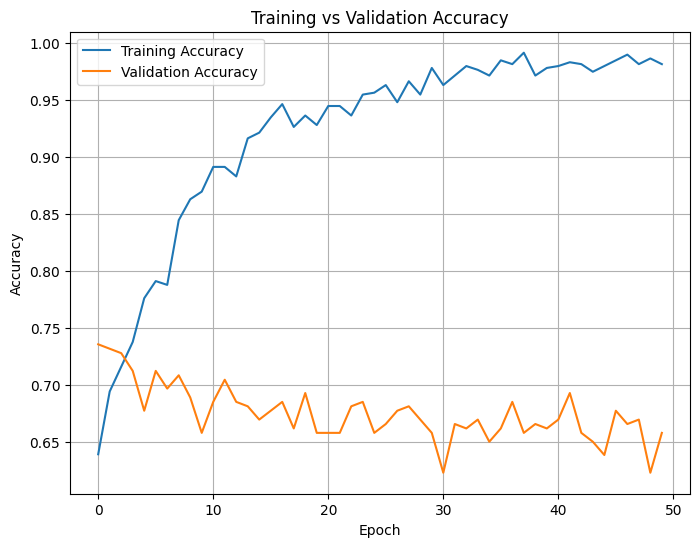

In [29]:
def plot_training_history(history):
    plt.figure(figsize=(8,6))
    
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history)

In [30]:
predicted_probabilities = model_dnn.predict(X_test)
predicted_probabilities = np.rint(predicted_probabilities)


print("DNN")
print("Accuracy:", accuracy_score(y_test, predicted_probabilities))
print(len(y_test))

9/9 [==============================] - 0s 2ms/step
DNN
Accuracy: 0.708171206225681


In [31]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf

# Set up 14-fold cross-validation
kf = KFold(n_splits=14, shuffle=True, random_state=42)

accuracies = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    print(f"\n--- Fold {fold} ---")
    
    # X is a DataFrame, y is a NumPy array
    X_train1, X_test1 = X.iloc[train_idx], X.iloc[test_idx]
    y_train1, y_test1 = y[train_idx], y[test_idx]
    
    history, model = run_binary_mlp(X_train1, y_train1, X_test1, y_test1, hidden=400, epochs=3)
    
    # After training, evaluate on the test set to capture accuracy
    predicted_probabilities = model.predict(X_test1)
    predicted_classes = np.rint(predicted_probabilities)
    acc = accuracy_score(y_test1, predicted_classes)
    accuracies.append(acc)

# Convert to numpy array
accuracies_np = np.array(accuracies)
print("\nCross-validated accuracies:", accuracies_np)
print("Mean accuracy:", np.mean(accuracies_np))




--- Fold 1 ---
Epoch 1/3
100/100 [==============================] - 1s 7ms/step - loss: 0.6377 - accuracy: 0.6305 - val_loss: 0.5811 - val_accuracy: 0.6452
Epoch 2/3
100/100 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.7024 - val_loss: 0.6082 - val_accuracy: 0.6613
Epoch 3/3
100/100 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.7188 - val_loss: 0.6882 - val_accuracy: 0.6452
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 400)               163200    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 400)               160400    
                                                                 
 dense_10 (

 dense_26 (Dense)            (None, 400)               160400    
                                                                 
 dense_27 (Dense)            (None, 1)                 401       
                                                                 
Total params: 484401 (1.85 MB)
Trainable params: 484401 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
25/25 [==============================] - 0s 2ms/step
Accuracy on train set: 83.12%
2/2 [==============================] - 0s 3ms/step
Accuracy on test set: 73.77%
[[10  8]
 [ 8 35]]
2/2 [==============================] - 0s 4ms/step

--- Fold 6 ---
Epoch 1/3
100/100 [==============================] - 1s 5ms/step - loss: 0.6300 - accuracy: 0.6486 - val_loss: 0.5986 - val_accuracy: 0.7049
Epoch 2/3
100/100 [==============================] - 0s 3ms/step - loss: 0.5677 - accuracy: 0.7003 - val_loss: 0.5785 - val_accuracy: 0.7049
Epoch 3/3
100/100 [==================

100/100 [==============================] - 0s 3ms/step - loss: 0.5488 - accuracy: 0.7280 - val_loss: 0.4980 - val_accuracy: 0.7377
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 400)               163200    
                                                                 
 dropout_11 (Dropout)        (None, 400)               0         
                                                                 
 dense_45 (Dense)            (None, 400)               160400    
                                                                 
 dense_46 (Dense)            (None, 400)               160400    
                                                                 
 dense_47 (Dense)            (None, 1)                 401       
                                                                 
Total params: 484401 (1.85 MB)
Trainable params: 48440

Total params: 484401 (1.85 MB)
Trainable params: 484401 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
25/25 [==============================] - 0s 2ms/step
Accuracy on train set: 79.09%
2/2 [==============================] - 0s 3ms/step
Accuracy on test set: 68.85%
[[11  9]
 [10 31]]
2/2 [==============================] - 0s 3ms/step

Cross-validated accuracies: [0.64516129 0.68852459 0.67213115 0.68852459 0.73770492 0.73770492
 0.68852459 0.57377049 0.68852459 0.73770492 0.62295082 0.68852459
 0.52459016 0.68852459]
Mean accuracy: 0.6702047291682406


In [32]:
len(X_train)

598

## Random Forest

In [33]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train, y_train)

preds_rf = clf.predict(X_test)
model_results_df['Random Forest'] = cross_val_score(clf,X, y, cv=14, scoring='accuracy')

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, preds_rf))

Random Forest
Accuracy: 0.7159533073929961


## KNN

In [34]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

preds_knn = neigh.predict(X_test)
model_results_df['KNN'] = cross_val_score(neigh,X, y, cv=14, scoring='accuracy')

print("KNN")
print("Accuracy:", accuracy_score(y_test, preds_knn))

KNN
Accuracy: 0.6731517509727627


## Decision Tree Classifier

In [35]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

preds_dtc = dtc.predict(X_test)
model_results_df['Decision Tree Classifier'] = cross_val_score(dtc,X, y, cv=14, scoring='accuracy')

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, preds_dtc))

Decision Tree
Accuracy: 0.6459143968871596


## SVM

In [36]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

preds_svm = svm_model.predict(X_test)
model_results_df['SVM'] = cross_val_score(svm_model,X, y, cv=14, scoring='accuracy')

print("svm")
print("Accuracy:", accuracy_score(y_test, preds_svm))

svm
Accuracy: 0.708171206225681


## Gaussian NB

In [37]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train, y_train).predict(X_test)
model_results_df['Gaussian NB'] = cross_val_score(gnb,X, y, cv=14, scoring='accuracy')

print("gaussianNB")
print("Accuracy:", accuracy_score(y_test, gnb_preds))

gaussianNB
Accuracy: 0.6536964980544747


## Confusion Matrices

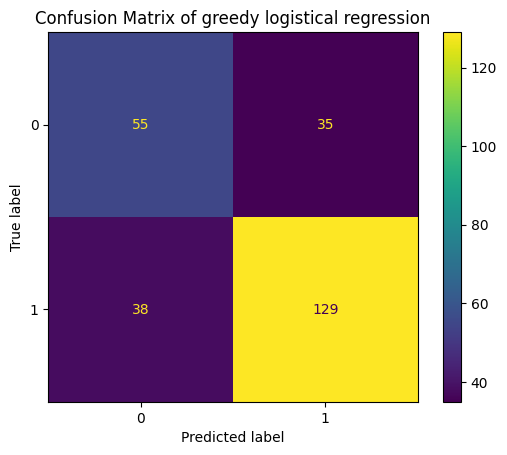

In [38]:
predicted_labels = greedy_lr.predict(X_test[selected_features])

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of greedy logistical regression")
plt.show()

9/9 [==============================] - 0s 2ms/step


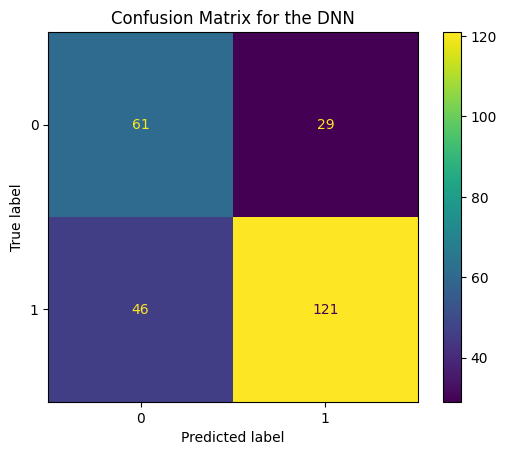

In [39]:
predicted_probabilities = model_dnn.predict(X_test)
predicted_labels = np.rint(predicted_probabilities) 


cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for the DNN")
plt.show()

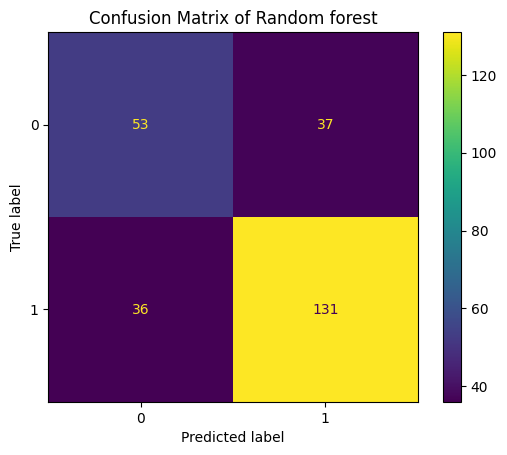

In [40]:
predicted_labels = clf.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Random forest")
plt.show()

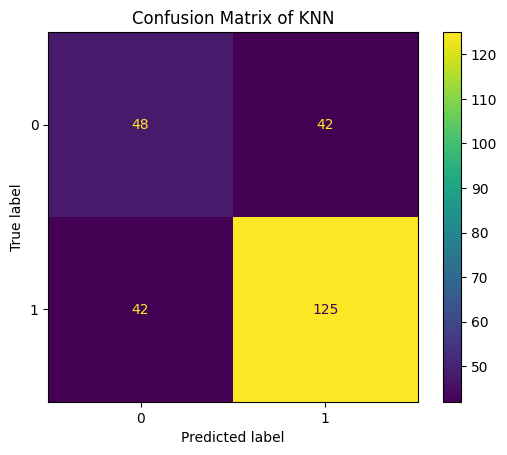

In [41]:
predicted_labels = neigh.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of KNN")
plt.show()

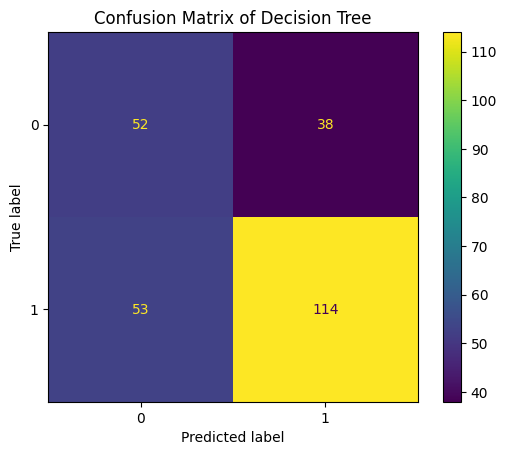

In [42]:
predicted_labels = dtc.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree")
plt.show()

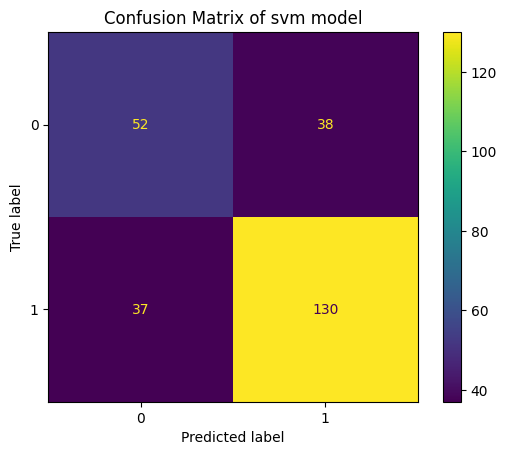

In [43]:
predicted_labels = svm_model.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of svm model")
plt.show()

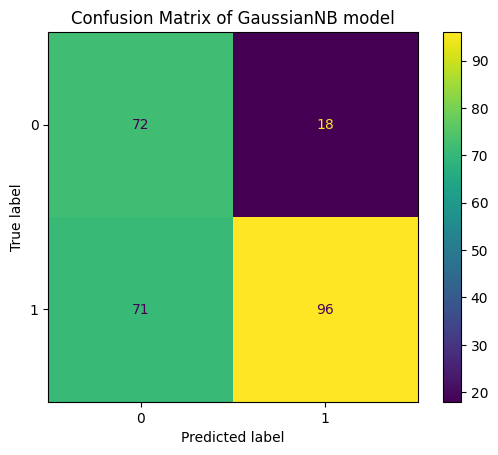

In [44]:
predicted_labels = gnb.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of GaussianNB model")
plt.show()

## Dimensionality Reduction

In [45]:
df_reduced = df_all_scaled.copy()

df_reduced = df_reduced.drop(columns=['TEAM NO'])

svd = TruncatedSVD(n_components=10, random_state=42) 
X_svd = svd.fit_transform(df_reduced)
X_svd.shape

(924, 10)

**Take each CSV and smash them each into one feature using dimensionality reduction**

In [46]:
csv_reduced_features = []

for df in list_csvs:
    df_ints = df.select_dtypes(exclude=['object'])
    df_cleans = df_ints.dropna()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cleans)
    
    svd_csv = TruncatedSVD(n_components = 2, random_state = 42)
    X_reduced = svd_csv.fit_transform(X_scaled)

    print(svd_csv.explained_variance_ratio_.sum())

    csv_reduced_features.append(X_reduced.flatten())
    


0.302841714233853
0.5016274635539983
0.5720713111437685
0.4907871162610655
0.3683332706064817
0.29911836864584707
0.3305843679201635
0.24922210274594164


In [47]:
df_10d = pd.DataFrame(X_svd)
df_10d["TEAM NO"] = df_all_scaled['TEAM NO']

In [48]:
pred_winners2 = []
true_winners2 = []
difference_vectors2 = []

skipped = 0  # Track skipped matchups

for matchup in matchups:
    team_1_NO = str(matchup[0])
    team_0_NO = str(matchup[1])

    # Look up rows in df_10d
    team_1_row = df_10d[df_10d["TEAM NO"] == team_1_NO]
    team_0_row = df_10d[df_10d["TEAM NO"] == team_0_NO]

    if not team_1_row.empty and not team_0_row.empty:
        true_winners2.append(matchup[2])

        # Drop TEAM NO and convert to numpy arrays
        team_1_vector = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_vector = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Compute difference vector
        difference_vector = team_1_vector - team_0_vector
        difference_vectors2.append(difference_vector)
    else:
        skipped += 1

print(f"✅ Finished creating reduced difference vectors. Skipped {skipped} matchups.")

# Convert to DataFrame
X = pd.DataFrame(difference_vectors2, columns=[f"SVD_{i+1}" for i in range(10)])
y = np.array(true_winners2)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

✅ Finished creating reduced difference vectors. Skipped 1 matchups.


### Logistic Regression

In [49]:
LR_model_dr = LogisticRegression()
LR_model_dr.fit(X_train, y_train)

predicted_winners = LR_model_dr.predict(X_test)
model_results_df['Feature Reduced Linear Regression'] = cross_val_score(LR_model_dr,X, y, cv=14, scoring='accuracy')

print("Accuracy:", accuracy_score(y_test, predicted_winners))

Accuracy: 0.5789473684210527


### Greedy Logistic Regression

In [50]:
# Greedy logistic regression
greedy_lr_dr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train.columns:
    score = cross_val_score(greedy_lr_dr, X_train[[feature]], y_train, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr_dr, X_train[current_features], y_train, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr_dr.fit(X_train[selected_features], y_train)


predicted_winners_glr_dr = greedy_lr_dr.predict(X_test[selected_features])
model_results_df['Feature Reduced Greedy Linear Regression'] = cross_val_score(greedy_lr_dr,X, y, cv=14, scoring='accuracy')

print("Accuracy:", accuracy_score(y_test, predicted_winners_glr_dr))

✅ Added: SVD_1 | New CV Accuracy: 0.7700
❌ Skipped: SVD_3 | CV Accuracy would be: 0.7700
❌ Skipped: SVD_4 | CV Accuracy would be: 0.7450
❌ Skipped: SVD_6 | CV Accuracy would be: 0.7450
❌ Skipped: SVD_7 | CV Accuracy would be: 0.7450
❌ Skipped: SVD_9 | CV Accuracy would be: 0.7450
❌ Skipped: SVD_10 | CV Accuracy would be: 0.7700
❌ Skipped: SVD_5 | CV Accuracy would be: 0.7200
❌ Skipped: SVD_2 | CV Accuracy would be: 0.7000
✅ Added: SVD_8 | New CV Accuracy: 0.7950
Accuracy: 0.631578947368421


### DNN

Epoch 1/50
6/6 [==============================] - 1s 38ms/step - loss: 0.7547 - accuracy: 0.5814 - val_loss: 0.6843 - val_accuracy: 0.6316
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.5875 - accuracy: 0.6977 - val_loss: 0.7032 - val_accuracy: 0.6316
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.4608 - accuracy: 0.7907 - val_loss: 0.7001 - val_accuracy: 0.4737
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.4828 - accuracy: 0.6977 - val_loss: 0.7332 - val_accuracy: 0.4737
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3972 - accuracy: 0.7907 - val_loss: 0.7959 - val_accuracy: 0.4737
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.4222 - accuracy: 0.7442 - val_loss: 0.8270 - val_accuracy: 0.4737
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.4395 - accuracy: 0.7674 - val_loss: 0.8536 - val_accuracy: 0.4211
Epoch 8/50
6/6 [=================

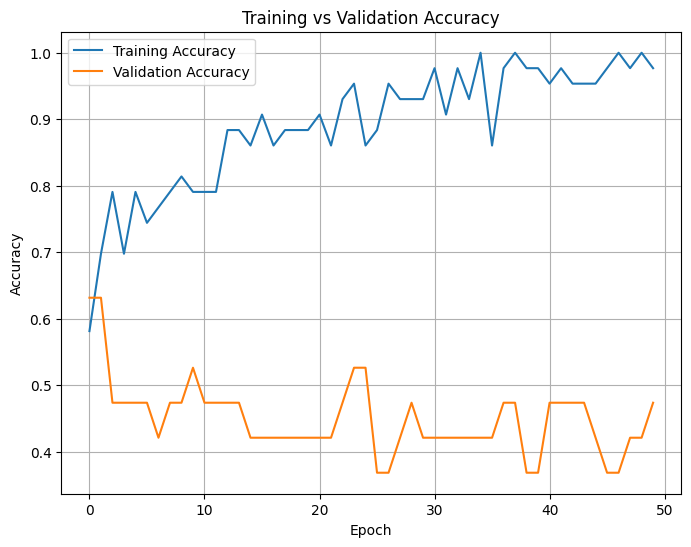

In [51]:
history_dr, model_dnn_dr = run_binary_mlp(X_train, y_train, X_test, y_test,400,50)
plot_training_history(history_dr)

In [52]:
predicted_probabilities = model_dnn_dr.predict(X_test)
predicted_probabilities = np.rint(predicted_probabilities)
print("DNN")
print("Accuracy:", accuracy_score(y_test, predicted_probabilities))

1/1 [==============================] - 0s 21ms/step
DNN
Accuracy: 0.47368421052631576


In [53]:
# Set up 14-fold cross-validation
kf = KFold(n_splits=14, shuffle=True, random_state=42)

accuracies = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    print(f"\n--- Fold {fold} ---")
    
    # X is a DataFrame, y is a NumPy array
    X_train2, X_test2 = X.iloc[train_idx], X.iloc[test_idx]
    y_train2, y_test2 = y[train_idx], y[test_idx]
    
    history, model = run_binary_mlp(X_train2, y_train2, X_test2, y_test2, hidden=400, epochs=3)
    
    # After training, evaluate on the test set to capture accuracy
    predicted_probabilities = model.predict(X_test2)
    predicted_classes = np.rint(predicted_probabilities)
    acc = accuracy_score(y_test2, predicted_classes)
    accuracies.append(acc)

# Convert to numpy array
accuracies_np = np.array(accuracies)
print("\nCross-validated accuracies:", accuracies_np)
print("Mean accuracy:", np.mean(accuracies_np))

model_results_df['Feature Reduced DNN']  = accuracies


--- Fold 1 ---
Epoch 1/3
8/8 [==============================] - 1s 29ms/step - loss: 0.7715 - accuracy: 0.5789 - val_loss: 0.5276 - val_accuracy: 0.8000
Epoch 2/3
8/8 [==============================] - 0s 6ms/step - loss: 0.7015 - accuracy: 0.5614 - val_loss: 0.7310 - val_accuracy: 0.4000
Epoch 3/3
8/8 [==============================] - 0s 6ms/step - loss: 0.5254 - accuracy: 0.7018 - val_loss: 0.7167 - val_accuracy: 0.4000
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 400)               4400      
                                                                 
 dropout_17 (Dropout)        (None, 400)               0         
                                                                 
 dense_69 (Dense)            (None, 400)               160400    
                                                                 
 dense_70 (Dense)    

8/8 [==============================] - 1s 26ms/step - loss: 0.7185 - accuracy: 0.5965 - val_loss: 0.9686 - val_accuracy: 0.4000
Epoch 2/3
8/8 [==============================] - 0s 5ms/step - loss: 0.6827 - accuracy: 0.6842 - val_loss: 0.9781 - val_accuracy: 0.6000
Epoch 3/3
8/8 [==============================] - 0s 7ms/step - loss: 0.5699 - accuracy: 0.7193 - val_loss: 0.8685 - val_accuracy: 0.4000
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 400)               4400      
                                                                 
 dropout_21 (Dropout)        (None, 400)               0         
                                                                 
 dense_85 (Dense)            (None, 400)               160400    
                                                                 
 dense_86 (Dense)            (None, 400)       

 dense_103 (Dense)           (None, 1)                 401       
                                                                 
Total params: 325601 (1.24 MB)
Trainable params: 325601 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 [==============================] - 0s 4ms/step
Accuracy on train set: 74.14%
1/1 [==============================] - 0s 20ms/step
Accuracy on test set: 75.00%
[[0 0]
 [1 3]]
1/1 [==============================] - 0s 20ms/step

--- Fold 10 ---
Epoch 1/3
8/8 [==============================] - 1s 34ms/step - loss: 0.7976 - accuracy: 0.4655 - val_loss: 0.9177 - val_accuracy: 0.2500
Epoch 2/3
8/8 [==============================] - 0s 6ms/step - loss: 0.6016 - accuracy: 0.6552 - val_loss: 0.7551 - val_accuracy: 0.5000
Epoch 3/3
8/8 [==============================] - 0s 6ms/step - loss: 0.5794 - accuracy: 0.7069 - val_loss: 0.6735 - val_accuracy: 0.5000
Model: "sequential_26"
___________________

 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 400)               4400      
                                                                 
 dropout_30 (Dropout)        (None, 400)               0         
                                                                 
 dense_121 (Dense)           (None, 400)               160400    
                                                                 
 dense_122 (Dense)           (None, 400)               160400    
                                                                 
 dense_123 (Dense)           (None, 1)                 401       
                                                                 
Total params: 325601 (1.24 MB)
Trainable params: 325601 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 [==============================] - 0s 2ms/step
Accuracy on train set: 75.86%
1/1 [====================

In [54]:
model_results_df

,Baseline,Linear Regression All,Linear Regression Greedy,Random Forest,KNN,Decision Tree Classifier,SVM,Gaussian NB,Feature Reduced Linear Regression,Feature Reduced Greedy Linear Regression,Feature Reduced DNN
0,0.682540,0.741935,0.741935,0.629032,0.645161,0.516129,0.596774,0.661290,0.40,0.40,0.40
1,0.682540,0.655738,0.672131,0.590164,0.557377,0.459016,0.590164,0.672131,0.60,0.60,0.60
2,0.730159,0.786885,0.786885,0.754098,0.688525,0.688525,0.721311,0.737705,0.20,0.20,0.80
3,0.682540,0.754098,0.754098,0.688525,0.639344,0.590164,0.721311,0.704918,0.60,0.60,0.00
4,0.650794,0.672131,0.672131,0.639344,0.622951,0.622951,0.639344,0.639344,0.40,0.40,0.40
5,0.809524,0.803279,0.819672,0.786885,0.754098,0.622951,0.786885,0.754098,0.80,0.80,0.80
6,0.666667,0.622951,0.639344,0.803279,0.688525,0.622951,0.770492,0.721311,0.75,0.75,0.75
7,0.761905,0.688525,0.688525,0.819672,0.557377,0.672131,0.737705,0.803279,0.50,0.50,0.50
8,0.666667,0.688525,0.688525,0.754098,0.639344,0.590164,0.737705,0.655738,1.00,1.00,0.75
9,0.682540,0.590164,0.606557,0.672131,0.524590,0.573770,0.639344,0.639344,0.50,0.50,0.50


### Random Forest Classifer

In [55]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train, y_train)

preds_rf = clf.predict(X_test)
model_results_df['Feature Reduced Random Forest'] = cross_val_score(clf,X, y, cv=14, scoring='accuracy')

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, preds_rf))

Random Forest
Accuracy: 0.5263157894736842


### KNN

In [56]:
neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_train, y_train)

preds_knn = neigh.predict(X_test)
model_results_df['Feature Reduced KNN'] = cross_val_score(neigh,X, y, cv=14, scoring='accuracy')

print("KNN")
print("Accuracy:", accuracy_score(y_test, preds_knn))

KNN
Accuracy: 0.631578947368421


### Decision Tree Classifier

In [57]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

preds_dtc = dtc.predict(X_test)
model_results_df['Feature Reduced Decision Tree Classifier'] = cross_val_score(dtc,X, y, cv=14, scoring='accuracy')
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, preds_dtc))


Decision Tree
Accuracy: 0.5789473684210527


### SVM

In [58]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

preds_svm = svm_model.predict(X_test)
model_results_df['Feature Reduced SVM'] = cross_val_score(svm_model,X, y, cv=14, scoring='accuracy')

print("svm")
print("Accuracy:", accuracy_score(y_test, preds_svm))

svm
Accuracy: 0.631578947368421


### Gaussian NB

In [59]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train, y_train).predict(X_test)
model_results_df['Feature Reduced Gaussian NB']= cross_val_score(gnb,X, y, cv=14, scoring='accuracy')

print("gaussianNB")
print("Accuracy:", accuracy_score(y_test, gnb_preds))

gaussianNB
Accuracy: 0.631578947368421


## Confusion Matricies

Accuracy: 0.5789473684210527


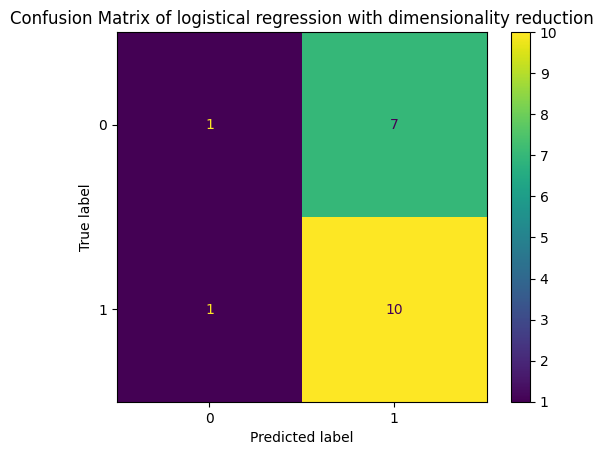

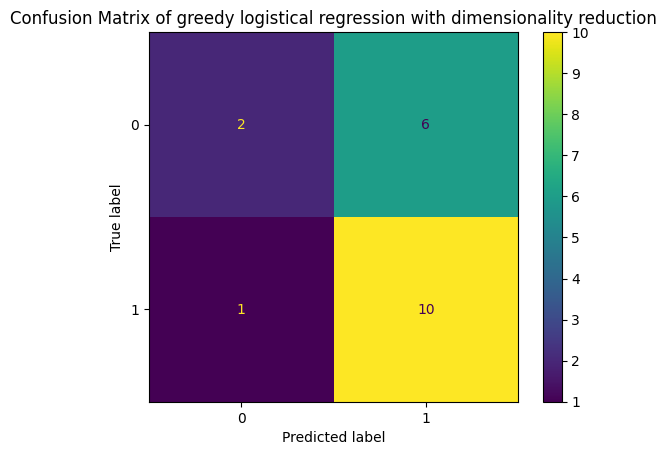

1/1 [==============================] - 0s 17ms/step


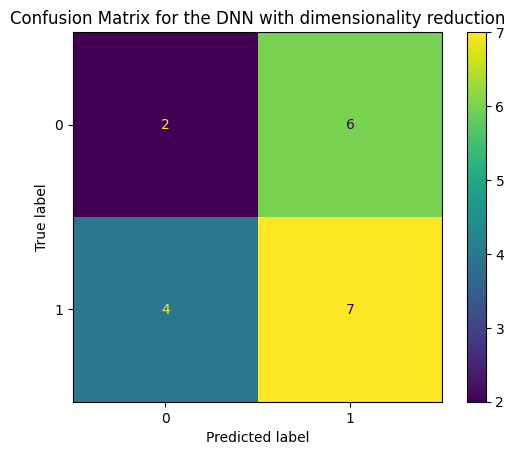

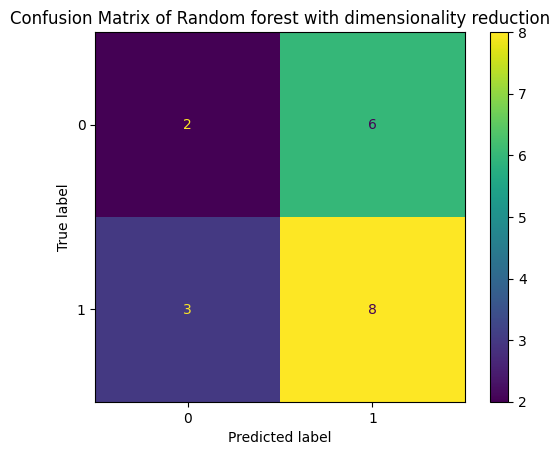

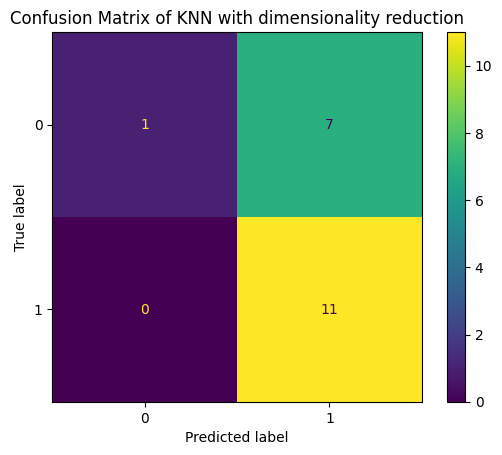

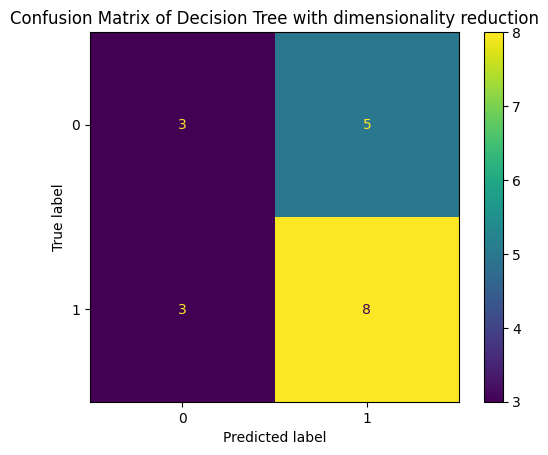

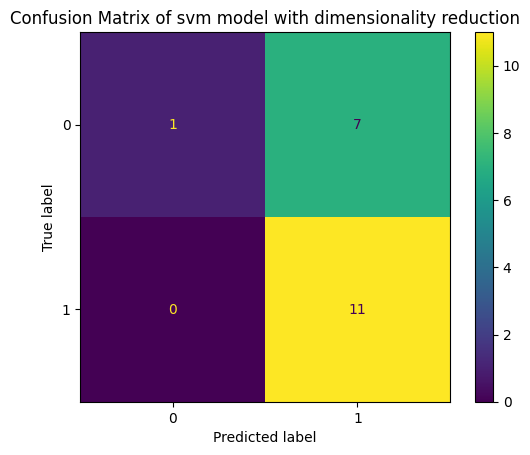

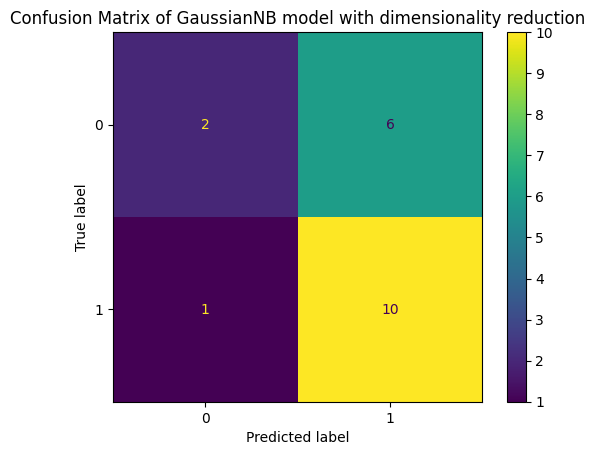

In [60]:
predicted_labels = LR_model_dr.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)

print("Accuracy:", accuracy_score(y_test, predicted_labels))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of logistical regression with dimensionality reduction")
plt.show()


predicted_labels = greedy_lr_dr.predict(X_test[selected_features])

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of greedy logistical regression with dimensionality reduction")
plt.show()

predicted_probabilities = model_dnn_dr.predict(X_test)
predicted_labels = np.rint(predicted_probabilities) 


cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for the DNN with dimensionality reduction")
plt.show()

predicted_labels = clf.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Random forest with dimensionality reduction")
plt.show()

predicted_labels = neigh.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of KNN with dimensionality reduction")
plt.show()

predicted_labels = dtc.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree with dimensionality reduction")
plt.show()

predicted_labels = svm_model.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of svm model with dimensionality reduction")
plt.show()

predicted_labels = gnb.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of GaussianNB model with dimensionality reduction")
plt.show()

## Models Using Correlation Based Feature Selection

In [61]:
difference_vectors3 = []
true_winners3 = []

skipped = 0  # Track how many matchups we skip

for matchup in matchups:
    team_1_NO = str(matchup[0])  # Make sure they're strings upfront
    team_0_NO = str(matchup[1])

    team_1_row = reduced_df_scaled[reduced_df_scaled["TEAM NO"] == team_1_NO]
    team_0_row = reduced_df_scaled[reduced_df_scaled["TEAM NO"] == team_0_NO]

    # Check if both teams exist in reduced_df_scaled
    if not team_1_row.empty and not team_0_row.empty:
        true_winners3.append(matchup[2])  # Now append only if valid

        # Get stats and remove "TEAM NO" column
        team_1_stats = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_stats = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Create difference vector
        difference_vector = team_1_stats - team_0_stats
        difference_vectors3.append(difference_vector)
    else:
        skipped += 1

print(f'Number of Matchups: {len(difference_vectors3)}')
print(f"✅ Finished creating vectors. Skipped {skipped} matchups due to missing teams.")

X3 = pd.DataFrame(difference_vectors3, columns=reduced_df_scaled.drop(columns=["TEAM NO"]).columns)
y3 = np.array(true_winners3)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

Number of Matchups: 62
✅ Finished creating vectors. Skipped 1 matchups due to missing teams.


### Logistic Regression

In [62]:
LR_model_dr = LogisticRegression()
LR_model_dr.fit(X_train3, y_train3)

predicted_winners3 = LR_model_dr.predict(X_test3)
model_results_df['CFS Linear Regression'] = cross_val_score(LR_model_dr,X, y, cv=14, scoring='accuracy')
print("Accuracy:", accuracy_score(y_test3, predicted_winners3))

Accuracy: 0.5263157894736842


### Greedy Logistic Regression

In [63]:
# Greedy logistic regression
greedy_lr_dr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train3.columns:
    score = cross_val_score(greedy_lr_dr, X_train3[[feature]], y_train3, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr_dr, X_train3[current_features], y_train3, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr_dr.fit(X_train3[selected_features], y_train3)


predicted_winners_glr_dr = greedy_lr_dr.predict(X_test3[selected_features])
model_results_df['CFS Greedy Linear Regression'] = cross_val_score(greedy_lr_dr,X, y, cv=14, scoring='accuracy')
print("Accuracy:", accuracy_score(y_test3, predicted_winners_glr_dr))

✅ Added: Q2 W | New CV Accuracy: 0.8000
❌ Skipped: TeamRankings_Home_LO | CV Accuracy would be: 0.7600
❌ Skipped: TeamRankings_Away_V 26-50 WINS | CV Accuracy would be: 0.7650
✅ Added: KenPom_Barttorvik_BADJ D RANK | New CV Accuracy: 0.8050
❌ Skipped: TeamRankings_Home_HI | CV Accuracy would be: 0.7850
❌ Skipped: TeamRankings_Home_V 51-100 WINS | CV Accuracy would be: 0.7550
❌ Skipped: Q1 W | CV Accuracy would be: 0.8050
❌ Skipped: Q1 PLUS Q2 W | CV Accuracy would be: 0.7550
❌ Skipped: TeamRankings_Away_V 51-100 WINS | CV Accuracy would be: 0.8050
❌ Skipped: TeamRankings_Away_LO | CV Accuracy would be: 0.7600
❌ Skipped: KenPom_Barttorvik_ELITE SOS | CV Accuracy would be: 0.8050
❌ Skipped: Barttorvik_Neutral_ELITE SOS RANK | CV Accuracy would be: 0.8050
❌ Skipped: Barttorvik_Home_BADJ D RANK | CV Accuracy would be: 0.7550
❌ Skipped: R SCORE | CV Accuracy would be: 0.7850
❌ Skipped: TeamRankings_Home_V 1-25 WINS | CV Accuracy would be: 0.8050
❌ Skipped: Barttorvik_Neutral_TALENT RANK | C

### DNN

Epoch 1/50
6/6 [==============================] - 1s 46ms/step - loss: 0.6874 - accuracy: 0.5349 - val_loss: 0.6932 - val_accuracy: 0.5789
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.5811 - accuracy: 0.6047 - val_loss: 0.6898 - val_accuracy: 0.6316
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 0.5406 - accuracy: 0.7442 - val_loss: 0.6746 - val_accuracy: 0.5789
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.4759 - accuracy: 0.7674 - val_loss: 0.6881 - val_accuracy: 0.5789
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 0.4624 - accuracy: 0.7674 - val_loss: 0.7110 - val_accuracy: 0.5789
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.4614 - accuracy: 0.7907 - val_loss: 0.7199 - val_accuracy: 0.6842
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.4297 - accuracy: 0.8140 - val_loss: 0.6992 - val_accuracy: 0.6842
Epoch 8/50
6/6 [=================

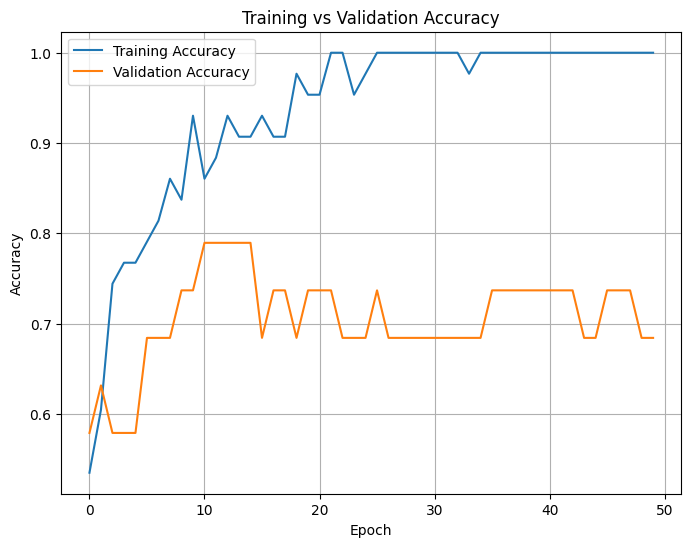

1/1 [==============================] - 0s 20ms/step
DNN
Accuracy: 0.6842105263157895


In [64]:
history_dr, model_dnn_dr = run_binary_mlp(X_train3, y_train3, X_test3, y_test3,400,50)
plot_training_history(history_dr)

predicted_probabilities = model_dnn_dr.predict(X_test3)
predicted_probabilities = np.rint(predicted_probabilities)
print("DNN")

print("Accuracy:", accuracy_score(y_test3, predicted_probabilities))

In [65]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf

# Set up 14-fold cross-validation
kf = KFold(n_splits=14, shuffle=True, random_state=42)

accuracies = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    print(f"\n--- Fold {fold} ---")
    
    # X is a DataFrame, y is a NumPy array
    X_train3, X_test3 = X.iloc[train_idx], X.iloc[test_idx]
    y_train3, y_test3 = y[train_idx], y[test_idx]
    
    history, model = run_binary_mlp(X_train3, y_train3, X_test3, y_test3, hidden=400, epochs=3)
    
    # After training, evaluate on the test set to capture accuracy
    predicted_probabilities = model.predict(X_test3)
    predicted_classes = np.rint(predicted_probabilities)
    acc = accuracy_score(y_test3, predicted_classes)
    accuracies.append(acc)

# Convert to numpy array
accuracies_np = np.array(accuracies)
print("\nCross-validated accuracies:", accuracies_np)
print("Mean accuracy:", np.mean(accuracies_np))

model_results_df['CFS DNN'] = accuracies


--- Fold 1 ---
Epoch 1/3
8/8 [==============================] - 1s 34ms/step - loss: 0.7211 - accuracy: 0.5088 - val_loss: 0.7050 - val_accuracy: 0.6000
Epoch 2/3
8/8 [==============================] - 0s 5ms/step - loss: 0.6129 - accuracy: 0.6667 - val_loss: 0.8290 - val_accuracy: 0.4000
Epoch 3/3
8/8 [==============================] - 0s 6ms/step - loss: 0.6091 - accuracy: 0.6667 - val_loss: 0.9399 - val_accuracy: 0.4000
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 400)               4400      
                                                                 
 dropout_32 (Dropout)        (None, 400)               0         
                                                                 
 dense_129 (Dense)           (None, 400)               160400    
                                                                 
 dense_130 (Dense)   

                                                                 
 dense_147 (Dense)           (None, 1)                 401       
                                                                 
Total params: 325601 (1.24 MB)
Trainable params: 325601 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 [==============================] - 0s 3ms/step
Accuracy on train set: 73.68%
1/1 [==============================] - 0s 20ms/step
Accuracy on test set: 40.00%
[[1 2]
 [1 1]]
1/1 [==============================] - 0s 15ms/step

--- Fold 6 ---
Epoch 1/3
8/8 [==============================] - 1s 34ms/step - loss: 0.7263 - accuracy: 0.5263 - val_loss: 0.5463 - val_accuracy: 0.8000
Epoch 2/3
8/8 [==============================] - 0s 7ms/step - loss: 0.6061 - accuracy: 0.6316 - val_loss: 0.7107 - val_accuracy: 0.8000
Epoch 3/3
8/8 [==============================] - 0s 6ms/step - loss: 0.5647 - accuracy: 0.6842 - val_loss: 0.6740 

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 400)               4400      
                                                                 
 dropout_41 (Dropout)        (None, 400)               0         
                                                                 
 dense_165 (Dense)           (None, 400)               160400    
                                                                 
 dense_166 (Dense)           (None, 400)               160400    
                                                                 
 dense_167 (Dense)           (None, 1)                 401       
                                                                 
Total params: 325601 (1.24 MB)
Trainable params: 325601 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step
Accuracy on train set: 68.97%
1/1 [==============================] - 0s 15ms/step
Accuracy on test set: 100.00%
[[2 0]
 [0 2]]
1/1 [==============================] - 0s 15ms/step

Cross-validated accuracies: [0.4  0.6  0.8  0.2  0.4  0.8  0.75 0.25 0.75 0.75 0.5  1.   0.25 1.  ]
Mean accuracy: 0.6035714285714285


### Random Forrest 

In [66]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train3, y_train3)

preds_rf = clf.predict(X_test3)
model_results_df['CFS Random Forest'] = cross_val_score(clf,X, y, cv=14, scoring='accuracy')
print("Random Forest")
print("Accuracy:", accuracy_score(y_test3, preds_rf))

Random Forest
Accuracy: 0.5


### KNN

In [67]:
neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_train3, y_train3)

preds_knn = neigh.predict(X_test3)
model_results_df['CFS KNN'] = cross_val_score(neigh,X, y, cv=14, scoring='accuracy')
print("KNN")
print("Accuracy:", accuracy_score(y_test3, preds_knn))

KNN
Accuracy: 0.75


### Decision Tree Classifier

In [68]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train3, y_train3)

preds_dtc = dtc.predict(X_test3)
model_results_df['CFS Decision Tree Classifier'] = cross_val_score(dtc,X, y, cv=14, scoring='accuracy')
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test3, preds_dtc))

Decision Tree
Accuracy: 0.75


### SVM

In [69]:
svm_model = svm.SVC()
svm_model.fit(X_train3, y_train3)

preds_svm = svm_model.predict(X_test3)
model_results_df['CFS SVM'] = cross_val_score(svm_model,X, y, cv=14, scoring='accuracy')
print("svm")
print("Accuracy:", accuracy_score(y_test3, preds_svm))

svm
Accuracy: 0.75


### Gaussian NB

In [70]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train3, y_train3).predict(X_test3)
model_results_df['CFS Gaussian NB'] = cross_val_score(gnb,X, y, cv=14, scoring='accuracy')
print("gaussianNB")
print("Accuracy:", accuracy_score(y_test3, gnb_preds))

gaussianNB
Accuracy: 0.75


In [71]:
model_results_df


,Baseline,Linear Regression All,Linear Regression Greedy,Random Forest,KNN,Decision Tree Classifier,SVM,Gaussian NB,Feature Reduced Linear Regression,Feature Reduced Greedy Linear Regression,...,Feature Reduced SVM,Feature Reduced Gaussian NB,CFS Linear Regression,CFS Greedy Linear Regression,CFS DNN,CFS Random Forest,CFS KNN,CFS Decision Tree Classifier,CFS SVM,CFS Gaussian NB
0,0.682540,0.741935,0.741935,0.629032,0.645161,0.516129,0.596774,0.661290,0.40,0.40,...,0.60,0.40,0.40,0.40,0.40,0.60,0.60,0.60,0.60,0.40
1,0.682540,0.655738,0.672131,0.590164,0.557377,0.459016,0.590164,0.672131,0.60,0.60,...,0.60,0.40,0.60,0.60,0.60,0.40,0.60,0.80,0.60,0.40
2,0.730159,0.786885,0.786885,0.754098,0.688525,0.688525,0.721311,0.737705,0.20,0.20,...,0.60,0.40,0.20,0.20,0.80,0.60,0.60,0.60,0.60,0.40
3,0.682540,0.754098,0.754098,0.688525,0.639344,0.590164,0.721311,0.704918,0.60,0.60,...,0.60,0.60,0.60,0.60,0.20,0.60,0.60,0.60,0.60,0.60
4,0.650794,0.672131,0.672131,0.639344,0.622951,0.622951,0.639344,0.639344,0.40,0.40,...,0.60,0.40,0.40,0.40,0.40,0.20,0.40,0.60,0.60,0.40
5,0.809524,0.803279,0.819672,0.786885,0.754098,0.622951,0.786885,0.754098,0.80,0.80,...,0.80,0.40,0.80,0.80,0.80,0.80,0.60,0.60,0.80,0.40
6,0.666667,0.622951,0.639344,0.803279,0.688525,0.622951,0.770492,0.721311,0.75,0.75,...,0.75,1.00,0.75,0.75,0.75,1.00,0.75,0.50,0.75,1.00
7,0.761905,0.688525,0.688525,0.819672,0.557377,0.672131,0.737705,0.803279,0.50,0.50,...,0.75,0.50,0.50,0.50,0.25,0.50,0.25,1.00,0.75,0.50
8,0.666667,0.688525,0.688525,0.754098,0.639344,0.590164,0.737705,0.655738,1.00,1.00,...,0.75,0.50,1.00,1.00,0.75,0.50,1.00,0.75,0.75,0.50
9,0.682540,0.590164,0.606557,0.672131,0.524590,0.573770,0.639344,0.639344,0.50,0.50,...,0.50,0.50,0.50,0.50,0.75,0.50,1.00,0.50,0.50,0.50


In [72]:
import pandas as pd
from scipy.stats import ttest_rel

# Example: your DataFrame is called model_results_df
baseline = model_results_df.columns[0]

# Store results in a dictionary
t_test_results = {}

for model in model_results_df.columns[1:]:
    t_stat, p_value = ttest_rel(model_results_df[baseline], model_results_df[model])
    t_test_results[model] = {'t_stat': t_stat, 'p_value': p_value}

# Convert to DataFrame for easy viewing
t_test_df = pd.DataFrame(t_test_results).T
print(t_test_df)


                                            t_stat   p_value
Linear Regression All                     1.600299  0.133543
Linear Regression Greedy                  1.334547  0.204929
Random Forest                             0.552310  0.590106
KNN                                       4.571738  0.000524
Decision Tree Classifier                  6.501812  0.000020
SVM                                       1.831380  0.090050
Gaussian NB                               2.118314  0.053986
Feature Reduced Linear Regression         2.805501  0.014872
Feature Reduced Greedy Linear Regression  2.805501  0.014872
Feature Reduced DNN                       0.994133  0.338303
Feature Reduced Random Forest             3.329605  0.005430
Feature Reduced KNN                       1.310734  0.212631
Feature Reduced Decision Tree Classifier  1.975798  0.069795
Feature Reduced SVM                       1.923765  0.076558
Feature Reduced Gaussian NB               2.935541  0.011589
CFS Linear Regression   

In [73]:
# Apply Bonferroni correction (0.05 / 24)
alpha_corrected = 0.05 / 24

# Filter results where p-value < corrected threshold
significant_results = t_test_df[t_test_df['p_value'] < alpha_corrected]

print("Significant results (p < {:.5f}):".format(alpha_corrected))
print(significant_results)

Significant results (p < 0.00208):
                            t_stat   p_value
KNN                       4.571738  0.000524
Decision Tree Classifier  6.501812  0.000020
